C:\Users\anjal\AppData\Local\Temp\ipykernel_22832\3491854509.py:34: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_data['Count'] = df_data['Count'].fillna(method='ffill')  # forward fill first
C:\Users\anjal\AppData\Local\Temp\ipykernel_22832\3491854509.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_data['Count'] = df_data['Count'].fillna(method='bfill')  # then fill any leading NaNs


Mean: 21.07
Median: 22.0
Standard Deviation: 13.02
Lower Bound: -24.00
Upper Bound: 64.00
Number of Outliers Detected: 12
All Outliers Detected (Tukey Method):
                     Count  event_active  event_day
datetime                                           
2005-04-13 22:10:00     66             0          1
2005-07-03 23:00:00     66             0          1
2005-07-03 23:40:00     72             0          1
2005-07-14 08:25:00     90             0          1
2005-07-14 08:30:00     90             0          1
2005-07-14 08:50:00     70             0          1
2005-07-14 08:55:00     70             0          1
2005-07-14 09:00:00     70             0          1
2005-07-14 09:05:00     70             0          1
2005-07-14 09:10:00     70             0          1
2005-07-15 14:40:00     75             0          1
2005-08-26 22:30:00     70             0          1


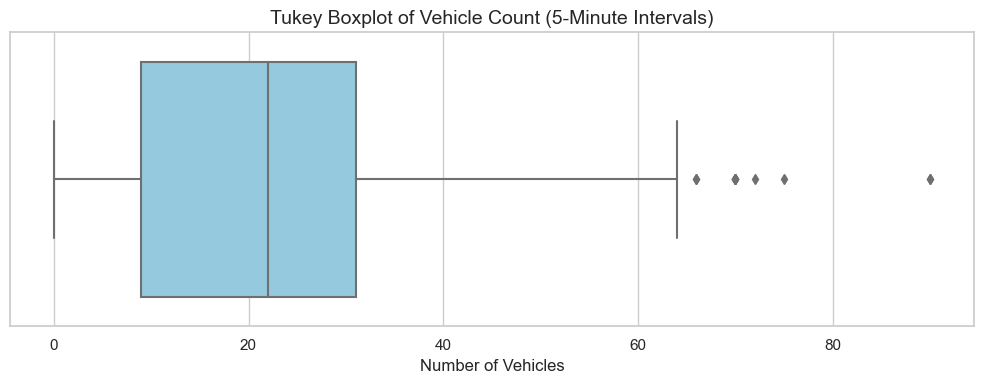

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


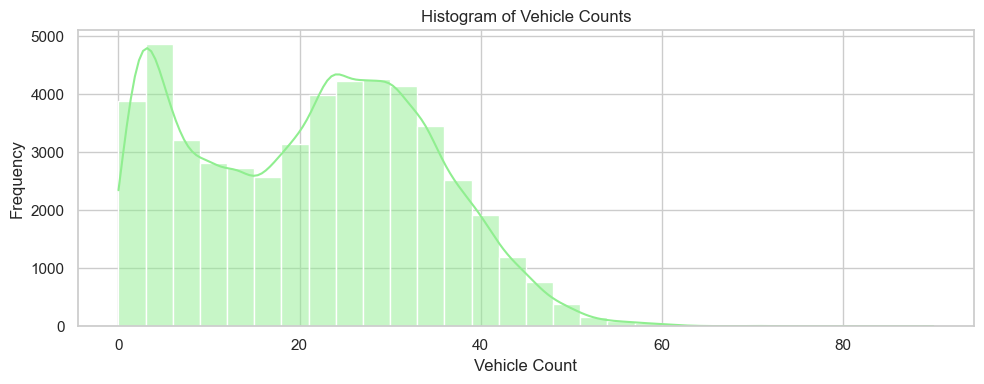

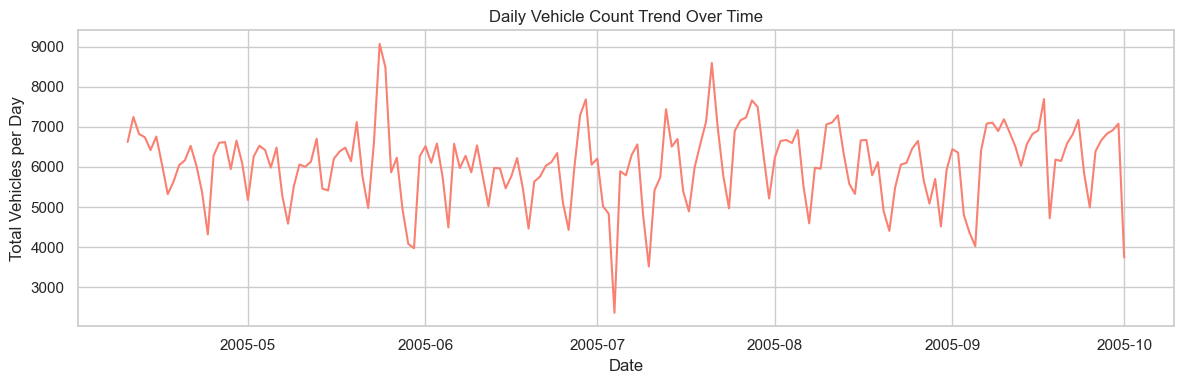

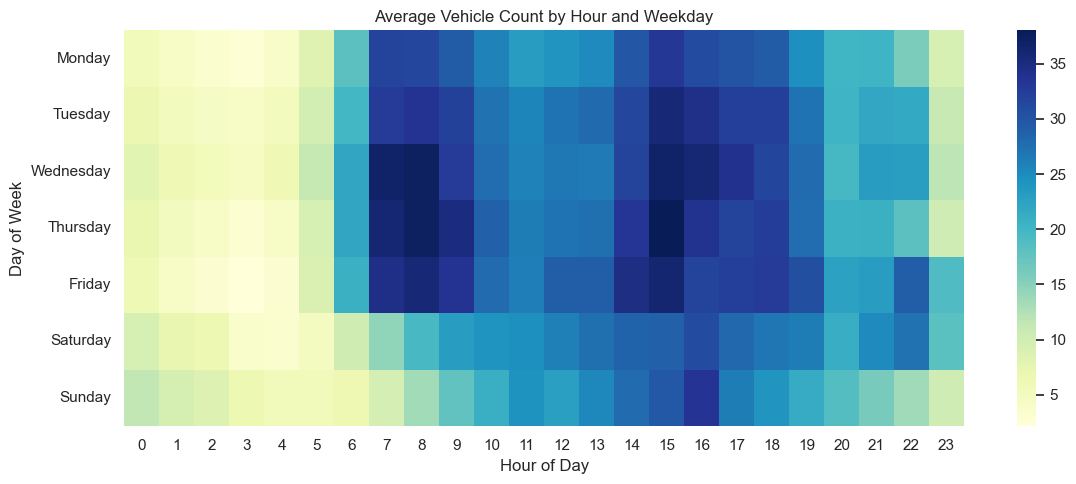

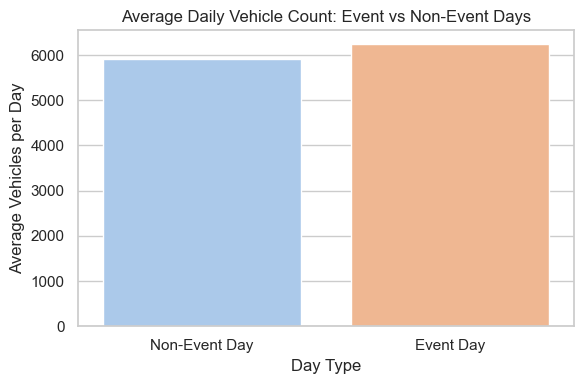

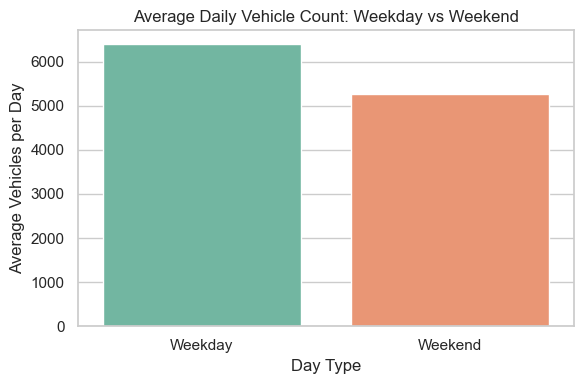

Peak Hour: 15:00 with average count: 34.05


C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


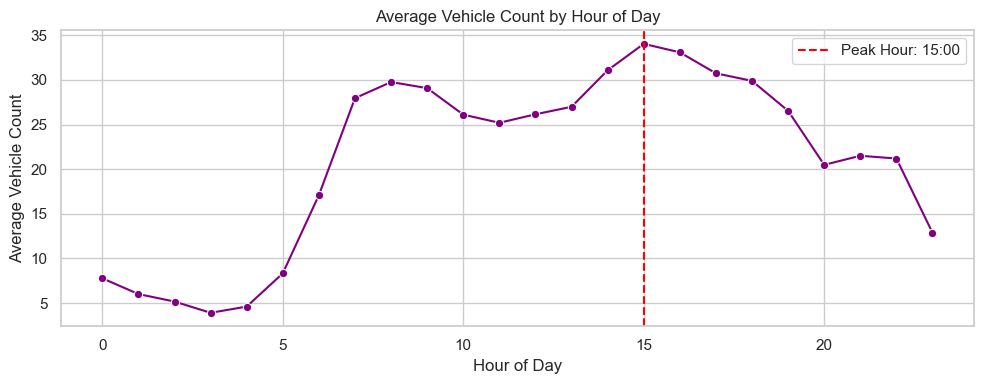

In [7]:
# -*- coding: utf-8 -*-
"""Parking lot- Vehicle.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/15Xi0PAOgGRJVh6Hdp0ypnFiTcScYgtZU

Data Cleaning - Parking lot Data
"""

import pandas as pd
import numpy as np

# === Load vehicle data ===
df_data = pd.read_csv("DogersData.csv")

# STEP 1: CLEAN VEHICLE COUNT DATA

# 1.1 Combine 'Date' and 'Time' into a single 'datetime' column
df_data['datetime'] = pd.to_datetime(df_data['Date'].astype(str) + ' ' + df_data['Time'].astype(str))

# 1.2 Drop the original 'Date' and 'Time' columns
df_data.drop(['Date', 'Time'], axis=1, inplace=True)

# 1.3 Set 'datetime' as the index
df_data.set_index('datetime', inplace=True)

# 1.4 Replace sensor error values (-1) with NaN
df_data['Count'] = df_data['Count'].replace(-1, np.nan)

# 1.5 Fill missing values using linear interpolation (assumes smooth transition between values)
df_data['Count'] = df_data['Count'].replace(-1, np.nan)
df_data['Count'] = df_data['Count'].fillna(method='ffill')  # forward fill first
df_data['Count'] = df_data['Count'].fillna(method='bfill')  # then fill any leading NaNs


# 1.6 Descriptive stats
mean_before = df_data['Count'].mean()
median_before = df_data['Count'].median()
missing_count = df_data['Count'].isna().sum()

# 1.7 Detect outliers using Tukey’s rule
Q1 = df_data['Count'].quantile(0.25)
Q3 = df_data['Count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_data[(df_data['Count'] < lower_bound) | (df_data['Count'] > upper_bound)]

# === Load events data ===
df_events = pd.read_csv("Dogers.csv")

# STEP 2: MERGE EVENTS DATA

# 2.1 Create full datetime for start and end of each event
df_events['start'] = pd.to_datetime(df_events['Date'].astype(str) + ' ' + df_events['Begin Event Time'].astype(str))
df_events['end'] = pd.to_datetime(df_events['Date'].astype(str) + ' ' + df_events['End Event Time'].astype(str))

# 2.2 Add 'event_active' column (1 if timestamp is during an event)
df_data['event_active'] = 0
for i, row in df_events.iterrows():
    df_data.loc[(df_data.index >= row['start']) & (df_data.index <= row['end']), 'event_active'] = 1

# 2.3 Add 'event_day' column (1 if the date had any event)
df_data['event_day'] = df_data.index.normalize().isin(df_events['Date'].unique()).astype(int)

# Preview cleaned data
df_data[['Count', 'event_active', 'event_day']].head(10)

df_data.to_excel("Cleaned_Parking_Data.xlsx")

"""Data cleaning - ParkingLot events"""

import pandas as pd

# STEP 0: Load the events dataset
df_events = pd.read_csv("Dogers.csv")

# STEP 1: Clean the 'Game attendance' column
# Some entries may be stored as strings or have extra formatting — this ensures they become numeric
df_events['Game Attendance'] = pd.to_numeric(df_events['Game Attendance'], errors='coerce')

# STEP 2: Clean the 'Score' column
# Remove any extra spaces or special characters around scores (e.g., '4-1 ' → '4-1')
df_events['Score'] = df_events['Score'].astype(str).str.strip()

# STEP 3: Clean the 'W/L' column
# Standardize the values to uppercase and strip any whitespace
df_events['W/L'] = df_events['W/L'].astype(str).str.upper().str.strip()

# STEP 4: Export the cleaned dataset to Excel and CSV
df_events.to_excel("Cleaned_Parking_Events.xlsx", index=False)

"""Finding Mean, Median,Std ,Outliers"""

import pandas as pd

# Load the cleaned data (if already saved, or continue with in-memory DataFrame)
df_data = pd.read_excel("Cleaned_Parking_Data.xlsx", index_col=0, parse_dates=True)

# --- Descriptive Statistics ---
mean_value = df_data['Count'].mean()
median_value = df_data['Count'].median()
std_value = df_data['Count'].std()

print(f"Mean: {mean_value:.2f}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_value:.2f}")

# --- Tukey Outlier Detection (IQR method) ---
Q1 = df_data['Count'].quantile(0.25)
Q3 = df_data['Count'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df_data[(df_data['Count'] < lower_bound) | (df_data['Count'] > upper_bound)]

print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")
print(f"Number of Outliers Detected: {len(outliers)}")



print("All Outliers Detected (Tukey Method):")
print(outliers.to_string(index=True))

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned data
df_data = pd.read_excel("Cleaned_Parking_Data.xlsx", index_col=0, parse_dates=True)

# Set plot style
sns.set(style="whitegrid")

# Create boxplot for 'Count'
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_data['Count'], color='skyblue')

# Add title and axis label
plt.title("Tukey Boxplot of Vehicle Count (5-Minute Intervals)", fontsize=14)
plt.xlabel("Number of Vehicles", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

"""Deccriptive Statisctics"""

plt.figure(figsize=(10, 4))
sns.histplot(df_data['Count'], bins=30, kde=True, color='lightgreen')
plt.title("Histogram of Vehicle Counts")
plt.xlabel("Vehicle Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

daily_counts = df_data['Count'].resample('D').sum()

plt.figure(figsize=(12, 4))
plt.plot(daily_counts.index, daily_counts.values, color='salmon')
plt.title("Daily Vehicle Count Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vehicles per Day")
plt.tight_layout()
plt.show()

heatmap_df = df_data.copy()
heatmap_df['hour'] = heatmap_df.index.hour
heatmap_df['weekday'] = heatmap_df.index.day_name()

pivot_heatmap = heatmap_df.groupby(['weekday', 'hour'])['Count'].mean().unstack()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_heatmap = pivot_heatmap.reindex(ordered_days)

plt.figure(figsize=(12, 5))
sns.heatmap(pivot_heatmap, cmap="YlGnBu")
plt.title("Average Vehicle Count by Hour and Weekday")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()

daily_df = df_data.resample('D').sum()
daily_df['event_day'] = df_data['event_day'].resample('D').max()

grouped = daily_df.groupby('event_day')['Count'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=grouped.index.map({0: 'Non-Event Day', 1: 'Event Day'}),
            y=grouped.values, palette='pastel')
plt.title("Average Daily Vehicle Count: Event vs Non-Event Days")
plt.ylabel("Average Vehicles per Day")
plt.xlabel("Day Type")
plt.tight_layout()
plt.show()

"""Weekend vs Weekday Vehicle Count"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df_data = pd.read_excel("Cleaned_Parking_Data.xlsx", index_col=0, parse_dates=True)

# Add weekday and weekend flag
df_data['weekday'] = df_data.index.weekday  # Monday=0, Sunday=6
df_data['is_weekend'] = df_data['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Resample to daily totals
daily_counts = df_data['Count'].resample('D').sum()
daily_counts = pd.DataFrame(daily_counts)
daily_counts['is_weekend'] = df_data['is_weekend'].resample('D').max()

# Group by weekend/weekday
grouped = daily_counts.groupby('is_weekend')['Count'].mean()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=grouped.index.map({0: 'Weekday', 1: 'Weekend'}),
            y=grouped.values, palette='Set2')
plt.title("Average Daily Vehicle Count: Weekday vs Weekend")
plt.ylabel("Average Vehicles per Day")
plt.xlabel("Day Type")
plt.tight_layout()
plt.show()

"""Peak hour identification"""

# Add hour column
df_data['hour'] = df_data.index.hour

# Group by hour
hourly_avg = df_data.groupby('hour')['Count'].mean()

# Find peak hour
peak_hour = hourly_avg.idxmax()
peak_value = hourly_avg.max()
print(f"Peak Hour: {peak_hour}:00 with average count: {peak_value:.2f}")

# Plot
plt.figure(figsize=(10, 4))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o', color='purple')
plt.title("Average Vehicle Count by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Vehicle Count")
plt.axvline(peak_hour, color='red', linestyle='--', label=f'Peak Hour: {peak_hour}:00')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


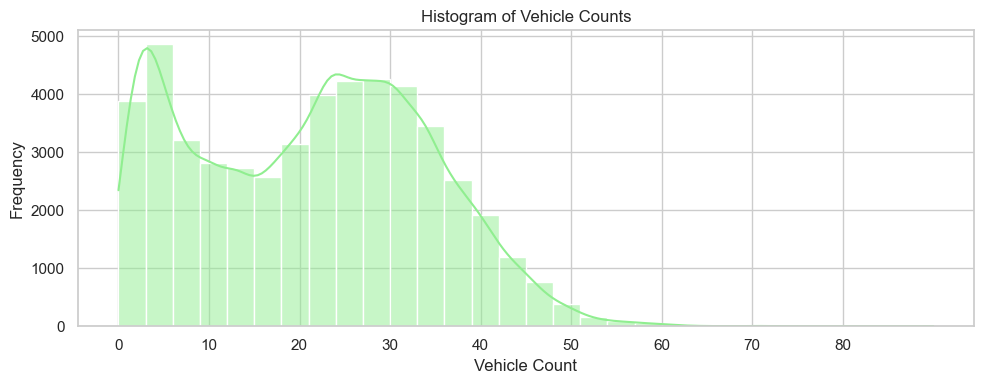

In [23]:
plt.figure(figsize=(10, 4))
sns.histplot(df_data['Count'], bins=30, kde=True, color='lightgreen')
plt.xticks(range(0, 81, 10))
plt.title("Histogram of Vehicle Counts")
plt.xlabel("Vehicle Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [37]:
import pandas as pd
import numpy as np

# Assuming df_data['Count'] is your data column
data = df_data['Count'].dropna().astype(int)

# Define bin edges that capture these integer intervals exactly
# We use -0.5 and 9.5 so that integers 0 to 9 fall into the first bin, 10 to 19 in second, etc.
bin_edges = [-0.5, 9.5, 19.5, 29.5, 39.5, 49.5, 59.5, 69.5, 79.5, 89.5, 99.5]

# Define labels for the intervals
labels = [f"{i}-{i+9}" for i in range(0, 100, 10)]
bin_count = list(range(1,91))
# Use pd.cut with include_lowest=True to include data exactly on left edge
bin_series = pd.cut(data, bins=bin_edges, labels=labels, include_lowest=True, right=True)

# Count the number of values in each bin
counts = bin_series.value_counts().sort_index()

# Print results
print(counts)


total_count = counts.sum()
print("Total count from bins:", total_count)

Count
0-9      12809
10-19     9294
20-29    13564
30-39    10823
40-49     3448
50-59      412
60-69       40
70-79        8
80-89        0
90-99        2
Name: count, dtype: int64
Total count from bins: 49559


In [91]:
bin_count = list(range(0,99))
df_count = pd.DataFrame(df_data['Count'].value_counts().sort_index()).reset_index()
cols = ['datetime', 'Count', 'event_active', 'event_day', 'weekday',
       'is_weekend', 'hour','capacity','overflow','vacancy']

for i in bin_count:
    if i not in list(df_count['Count']):
        df_count.loc[len(df_count)] = [i,0]
df_count.set_index('Count').sort_index()
sum_count = df_count['count'].sum()
df_count['Probability'] = df_count['count']/sum_count
df_count = df_count.set_index('Count')
top_5_capacity = df_count['Probability'].nlargest(5).reset_index()
top_5_capacity

,Count,Probability
0,3,0.038175
1,2,0.033234
2,4,0.032857
3,23,0.032044
4,27,0.031429


In [93]:
capacity = list(top_5_capacity['Count'])
sim_data = df_data.copy().reset_index()
cols = ['datetime', 'Count', 'event_active', 'event_day', 'weekday',
       'is_weekend', 'hour','capacity','overflow','vacancy']
sim_data_capacity = pd.DataFrame(columns=cols)
for i in capacity:
    print(i)
    #sim_data_temp = sim_data.copy()
    #sim_data_temp['capacity'] = i
    #sim_data_temp.loc[sim_data_temp['Count'] > i, 'overflow'] = 'Senior'
    for j in range(len(sim_data)):
        c = sim_data.loc[j,'Count']
        
        if c > i:
            overflow = c-i
        else:
            overflow = 0
        if c <= i:
            vacancy = i-c
        else:
            vacancy = 0
        list_a = [sim_data.loc[j,'datetime'],sim_data.loc[j,'Count'],sim_data.loc[j,'event_active'],sim_data.loc[j,'event_day'],sim_data.loc[j,'weekday'],sim_data.loc[j,'is_weekend'],sim_data.loc[j,'hour'],i,overflow,vacancy]
        sim_data_capacity.loc[len(sim_data_capacity)] = list_a
sim_data_capacity

3
2
4
23
27


,datetime,Count,event_active,event_day,weekday,is_weekend,hour,capacity,overflow,vacancy
0,2005-04-10 00:00:00,23,0,0,6,1,0,3,20,0
1,2005-04-10 00:05:00,23,0,0,6,1,0,3,20,0
2,2005-04-10 00:10:00,23,0,0,6,1,0,3,20,0
3,2005-04-10 00:15:00,23,0,0,6,1,0,3,20,0
4,2005-04-10 00:20:00,23,0,0,6,1,0,3,20,0
...,...,...,...,...,...,...,...,...,...,...
251995,2005-10-01 23:35:00,13,0,0,5,1,23,27,0,14
251996,2005-10-01 23:40:00,13,0,0,5,1,23,27,0,14
251997,2005-10-01 23:45:00,13,0,0,5,1,23,27,0,14
251998,2005-10-01 23:50:00,13,0,0,5,1,23,27,0,14


In [94]:
sim_data_capacity = sim_data_capacity.reset_index()
#sim_data_capacity
sim_data_capacity_group = sim_data_capacity.groupby(['capacity'])[['overflow','vacancy']].sum()
sim_data_capacity_group

,overflow,vacancy
capacity,,
2,964135,3051
3,917620,6936
4,873029,12745
23,229618,326934
27,145504,444420


ADF Statistic: -24.864
P-value: 0.000


C:\Users\anjal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)
C:\Users\anjal\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


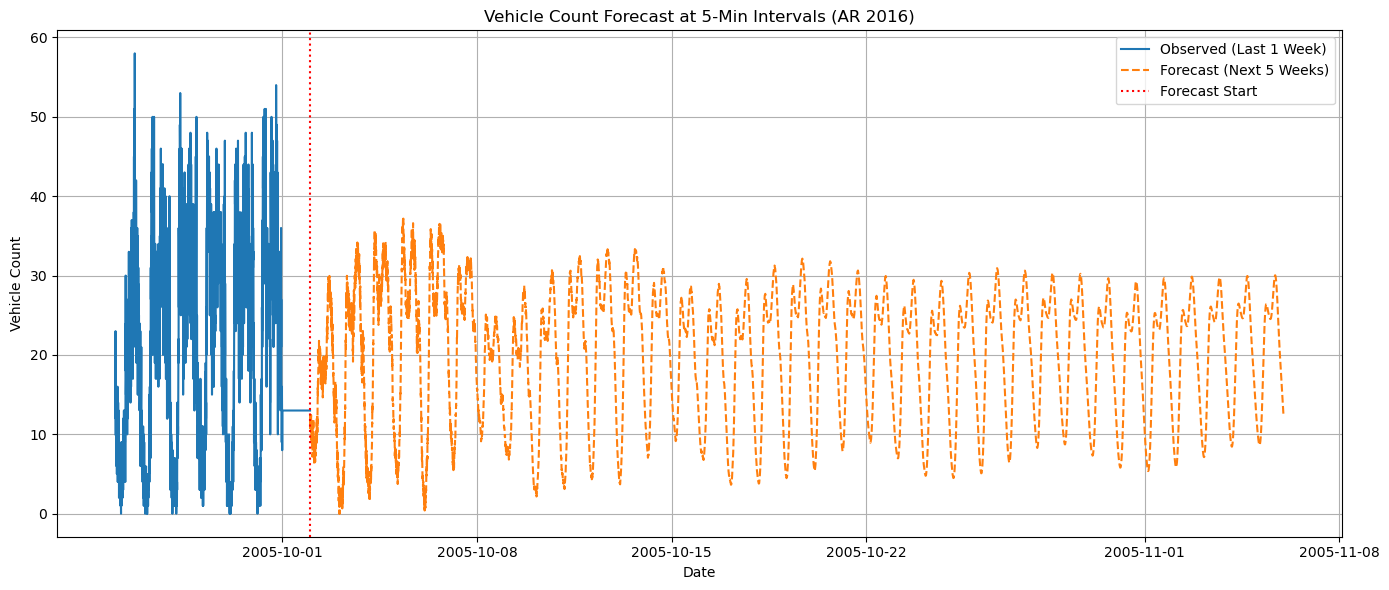


Weekly Forecast Summary:
2005-10-02     4797
2005-10-09    41830
2005-10-16    41305
2005-10-23    40884
2005-10-30    40556
2005-11-06    34546
Freq: W-SUN, dtype: int32


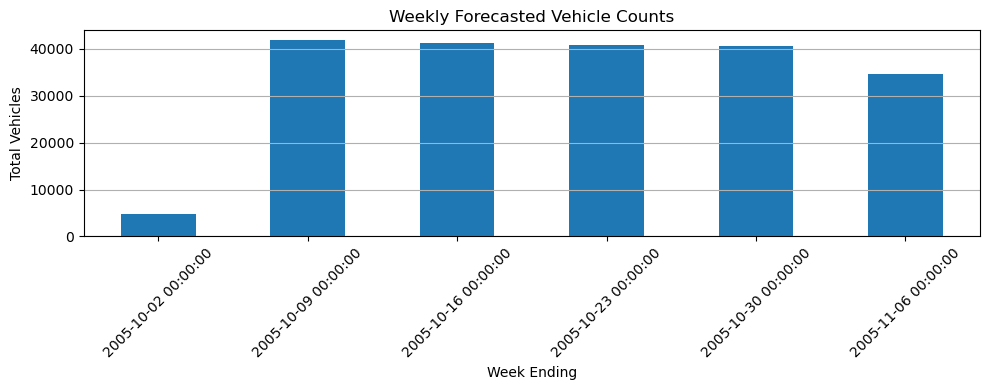


Files saved successfully:
 - Forecast_5min_Vehicle_Count.xlsx
 - Weekly_Vehicle_Summary.xlsx


In [3]:
# -*- coding: utf-8 -*-
"""Untitled7.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1A8mfmsPyR_BrhKQIAR1myE4UPJozXx7T
"""

# -*- coding: utf-8 -*-
"""Predictive Analysis at 5-Min Resolution"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller

# -------------------------------------
# Load 5-minute interval dataset
# -------------------------------------
df = pd.read_excel("Cleaned_Parking_Data-2.xlsx")
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Step 3: Use 5-Minute Interval Data Directly
# -------------------------------------
counts_5min = df['Count']  # 5-minute interval vehicle counts

# Step 4: Check Stationarity (ADF Test)
# -------------------------------------
result = adfuller(counts_5min.dropna())
print(f"ADF Statistic: {result[0]:.3f}")
print(f"P-value: {result[1]:.3f}")
if result[1] > 0.05:
    print("Series is non-stationary. Applying first-order differencing.")

data_diff = counts_5min.diff().dropna()

# Step 5: Fit AutoRegressive Model (Weekly Lag = 2016 intervals)
# -------------------------------------
model = AutoReg(data_diff, lags=2016, old_names=False)
model_fit = model.fit()

# Step 6: Forecast Next 5 Weeks (2016 * 5 intervals)
# -------------------------------------
steps = 2016 * 5   # total 5-min intervals for 5 weeks
forecast_diff = model_fit.predict(start=len(data_diff), end=len(data_diff) + steps - 1)

# Reconstruct original scale
last_value = counts_5min.iloc[-1]
forecast_values = last_value + forecast_diff.cumsum()

# Prevent negative predicted values
forecast_values[forecast_values < 0] = 0

# Assign future datetime index
forecast_values.index = pd.date_range(start=counts_5min.index[-1] + pd.Timedelta(minutes=5),
                                      periods=steps, freq='5T')

# Step 7: Visualization – Forecast Plot
# -------------------------------------
plt.figure(figsize=(14,6))
plt.plot(counts_5min.tail(2016), label="Observed (Last 1 Week)")
plt.plot(forecast_values, label="Forecast (Next 5 Weeks)", linestyle="--")
plt.axvline(x=counts_5min.index[-1], color='red', linestyle=':', label='Forecast Start')
plt.title("Vehicle Count Forecast at 5-Min Intervals (AR 2016)")
plt.xlabel("Date")
plt.ylabel("Vehicle Count")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Step 8: Weekly Summary Table
# -------------------------------------
weekly_summary = forecast_values.resample('W').sum().round(0).astype(int)
print("\nWeekly Forecast Summary:")
print(weekly_summary)

weekly_summary.plot(kind='bar', figsize=(10,4))
plt.title("Weekly Forecasted Vehicle Counts")
plt.xlabel("Week Ending")
plt.ylabel("Total Vehicles")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Step 9: Save Forecast Data to Excel
# -------------------------------------
forecast_df = pd.DataFrame({
    'datetime': forecast_values.index,
    'forecast_vehicle_count': forecast_values.values
})

weekly_df = pd.DataFrame({
    'week_ending': weekly_summary.index,
    'total_vehicles': weekly_summary.values
})

forecast_df.to_excel("Forecast_5min_Vehicle_Count.xlsx", index=False)
weekly_df.to_excel("Weekly_Vehicle_Summary.xlsx", index=False)

print("\nFiles saved successfully:")
print(" - Forecast_5min_Vehicle_Count.xlsx")
print(" - Weekly_Vehicle_Summary.xlsx")